In [3]:
pip install tensorflow

In [4]:
pip install tensorflow torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [33]:
import kagglehub
import os                                                ##  Modul os je součástí standardní knihovny Pythonu a umožňuje pracovat se soubory a adresáři v operačním systému. 
                                                         ##  Často se používá ke čtení/zápisu souborů, získání cest k souborům a manipulaci s adresáři. 

from PIL import Image                                    ## PIL (Python Imaging Library, dnes známá jako Pillow) je knihovna pro manipulaci s obrázky. 
                                                         ## Image umožňuje otevírat, upravovat a ukládat obrázky ve formátech jako PNG, JPEG, BMP atd. 

import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split     ## Rozdělení datasetu na trénovací a testovací část
from keras.utils import to_categorical                   ##  Konverze štítků do One-Hot Encoding, Místo číselného označení jako 0, 1, 2, 
                                                         ##  což by mohlo způsobit chyby v učení (síť by mohla mylně považovat 2 za „větší“ než 1), použijeme One-Hot Encoding:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Input,
    Dropout
)
from keras.applications import EfficientNetB0
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import InceptionV3
from keras.applications import MobileNetV3Large     ## je předtrénovaný model hlubokého učení určený pro rozpoznávání obrazu.
                                                    ## Model je předtrénován na obrovském datasetu ImageNet a lze jej dále upravit (tzv. transfer learning).
from keras.layers import GlobalAveragePooling2D     ## redukuje dimenzionalitu výstupních dat.
from keras.models import Model                      ## Model umožňuje sestavit vlastní architekturu neuronové sítě v Kerasu.
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.regularizers import l2
from keras.utils import to_categorical
from tensorflow.keras.applications.efficientnet import preprocess_input

In [6]:
# def plot_history(history):
#   """
#   Funkce na vykreslení dat z objectu history -> vrací ho metoda fit keras modelu
#   """
#   # plot the Loss curve(s)
#   plt.figure(figsize=[8,6])

#   plt.plot(history.history['loss'],'r',linewidth=3.0)
#   plt.plot(history.history['val_loss'],'b',linewidth=3.0)

#   plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
#   plt.xlabel('Epochs ',fontsize=16)
#   plt.ylabel('Loss',fontsize=16)
#   plt.title('Loss Curves',fontsize=16)
#   plt.show()

#   # plot the Accuracy curve(s)
#   plt.figure(figsize=[8,6])

#   plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
#   plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)

#   plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
#   plt.xlabel('Epochs ',fontsize=16)
#   plt.ylabel('Accuracy',fontsize=16)
#   plt.title('Accuracy Curves',fontsize=16)
#   plt.show()

## Načtení a preprocessing dat

In [7]:
path = r"C:\Users\zitao\Documents\PETR\DATA_SCIENCE\EMOCE"

In [8]:
fotky_emoce = os.listdir(f"{path}/test")

In [9]:
X_test = []    
y_test = []     
encoding = {}   

for index, emoce in enumerate(fotky_emoce):        
  encoding[index] = emoce
  folder_path = os.path.join(f"{path}/test", emoce)
  image_list = []   
  for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):       
        img_path = os.path.join(folder_path, filename) 
        img = Image.open(img_path) 
        img_resized = img.resize((48, 48))       
        img_array = np.array(img_resized)
        image_list.append(img_array)
  X_test += image_list   
  y_test += [index] * len(image_list)

In [10]:
X_test = np.stack(X_test)
y_test = np.array(y_test)

In [ ]:
def predict_with_best_model(best_model, input_data):
    model = tf.keras.models.load_model(best_model)
    input_data = np.array(input_data)
    predictions = model.predict(input_data)
    return predictions

In [ ]:
## list_modles = ['best_model_nase_neuronova_sit.keras', 'best_model_efficinetnet.keras', 'best_model_mobilnet.keras']
## predict_best_model([

In [11]:
model = load_model("best_model_nase_neuronova_sit.keras")

In [12]:
y_pred = model.predict(X_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [13]:
y_pred = np.argmax(y_pred, axis=1)

In [14]:
## y_test = np.argmax(y_test, axis=1)

In [15]:
encoding

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

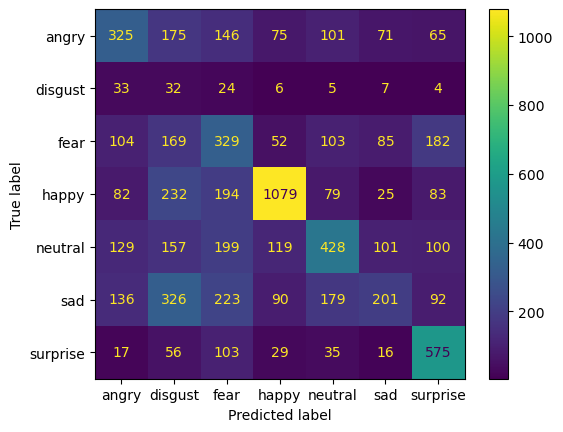

In [17]:
class_labels = list(encoding.values())
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [ ]:
model 

In [69]:
import cv2
import numpy as np
from tensorflow.keras.applications.mobilenet import preprocess_input

# Načtení obrázku
obrazek_mobilnet = cv2.imread("F30.jpg")  # Cesta k obrázku
obrazek_mobilnet = cv2.resize(obrazek_mobilnet, (48, 48,))  # MobileNet používá 224x224

# Převod na float32 a normalizace
obrazek_mobilnet = np.array(obrazek_mobilnet, dtype=np.float32)  # Převod na float32
obrazek_mobilnet = preprocess_input(obrazek_mobilnet)  # Normalizace na rozsah vhodný pro MobileNet

# Přidání dimenze (batch_size = 1)
obrazek_mobilnet = np.expand_dims(obrazek_mobilnet, axis=0)  # Z (224, 224, 3) na (1, 224, 224, 3)

# Ověření tvaru
print("Nový tvar:", obrazek_mobilnet.shape)

Nový tvar: (1, 48, 48, 3)


In [70]:
model_testovani = load_model("best_model_mobilnet.keras")

In [71]:
prediction_mobilnet = model_testovani.predict(obrazek_mobilnet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [72]:
prediction_mobilnet

array([[0.35965395, 0.00336825, 0.01279713, 0.07200494, 0.4179014 ,
        0.05447006, 0.07980435]], dtype=float32)

In [73]:
predicted_emotion_mobilnet = np.argmax(prediction_mobilnet) ## , axis=1)

In [74]:
encoding[predicted_emotion_mobilnet]

'neutral'

In [51]:
model = load_model("best_model_nase_neuronova_sit.keras")

In [52]:
import cv2
import numpy as np
from tensorflow.keras.applications.mobilenet import preprocess_input

obrazek = cv2.imread('muz_bryle.jpg') # načítam obrazek
obrazek = cv2.resize(obrazek, (48, 48,))  # MobileNet používá 224x224

# Převod na float32 a normalizace
obrazek = np.array(obrazek, dtype=np.float32)  # Převod na float32
obrazek = preprocess_input(obrazek)  # Normalizace na rozsah vhodný pro MobileNet

# Přidání dimenze (batch_size = 1)
obrazek = np.expand_dims(obrazek, axis=0)  # Z (224, 224, 3) na (1, 224, 224, 3)

# Ověření tvaru
print("Nový tvar:", obrazek.shape)

Nový tvar: (1, 48, 48, 3)


In [53]:
prediction_test = model.predict(obrazek)
prediction_test

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_3" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (1, 48, 48, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 48, 48, 3), dtype=float32)
  • training=False
  • mask=None